# Download tensorflow 1.14

In [1]:
%tensorflow_version 1.14
import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
1.15.2


# Import libraries

In [0]:
from pathlib import Path
import os
import pandas as pd
import librosa
import glob 
import matplotlib.pyplot as plt
import numpy as np
import librosa.display

# Tested out the audio files by playing it



In [0]:
data, sampling_rate = librosa.load('/content/sample_data/song2/24.923444444444446.mp3')

In [69]:
from IPython.display import Audio
Audio(data=data, rate=sampling_rate)

In [13]:
pip install pydub

In [0]:
from pydub import AudioSegment
sound = AudioSegment.from_mp3('/content/drive/My Drive/tring_tring_Dataset /2.mp3')

StartTime = 0
EndTime = 3*1000 # ms

# save 0 to 10s
Output_MP3 = sound[StartTime:EndTime]
Output_MP3.export('/content/sample_data/songs/conv2.mp3',format="mp3") 

# Tested out the audio files by plotting out the waveform

(150784,)
<class 'numpy.ndarray'>
[-0.01246557 -0.01945208 -0.01799202 ...  0.10794248  0.10556036
  0.11241627]


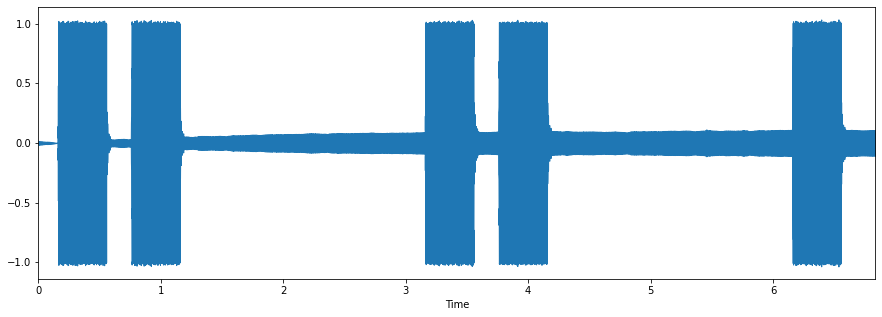

In [26]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)
print(data.shape)
print(type(data))
print(data)

# Tested out the audio files by plotting out the melspectogram

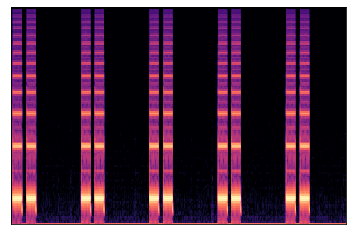

In [27]:
x, sr = librosa.load('/content/drive/My Drive/tring_tring_Dataset /1.mp3')
S=librosa.feature.melspectrogram(y=x, sr=sr)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max))

In [28]:
pip install praat-parselmouth

     |████████████████████████████████| 9.0MB 1.3MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


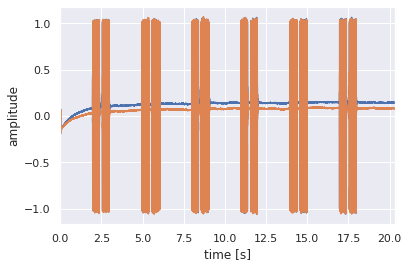

In [29]:
import parselmouth

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() # Use seaborn's default style to make attractive graphs

# Plot nice figures using Python's "standard" matplotlib library
snd = parselmouth.Sound("/content/drive/My Drive/tring_tring_Dataset /4.mp3")
plt.figure()
plt.plot(snd.xs(), snd.values.T)
#plt.scatter(snd.xs(), snd.values.T)
plt.xlim([snd.xmin, snd.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show()

# I made intensity spectograms for all the emotions using Parselmouth library. https://github.com/YannickJadoul/Parselmouth

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.6/dist-packages/ipykernel

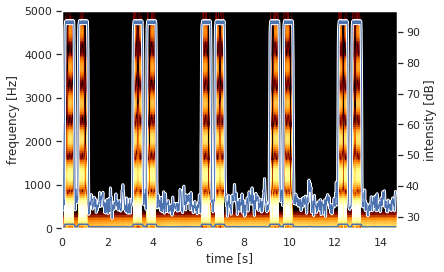

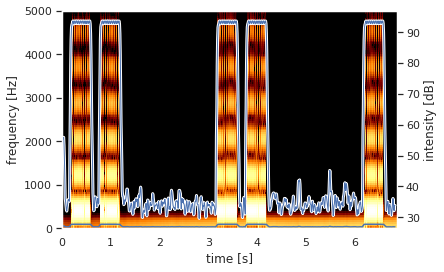

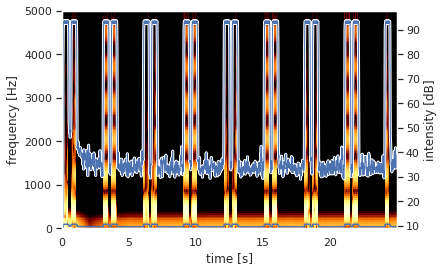

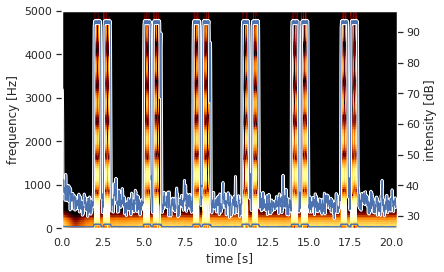

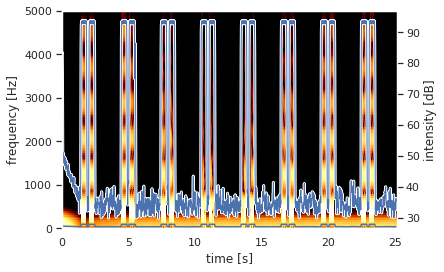

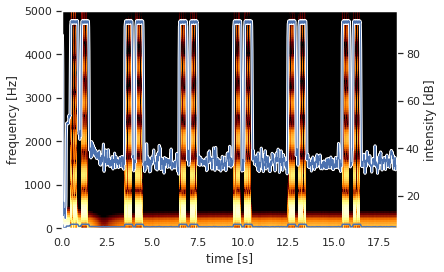

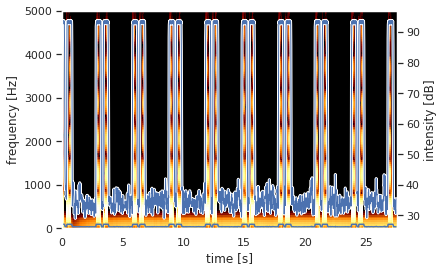

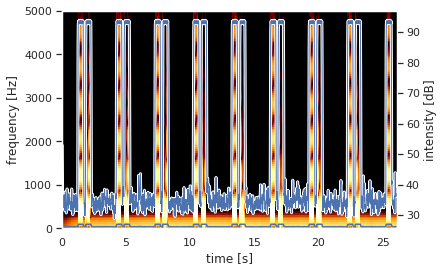

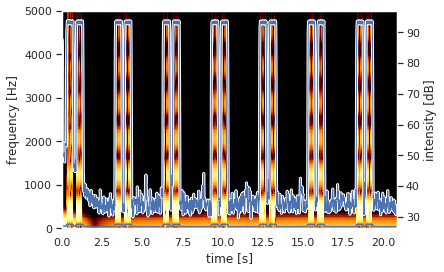

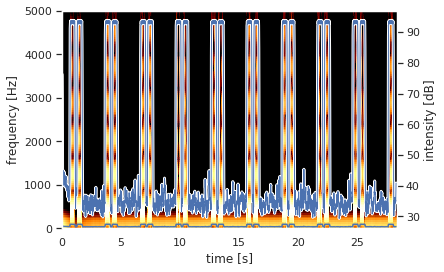

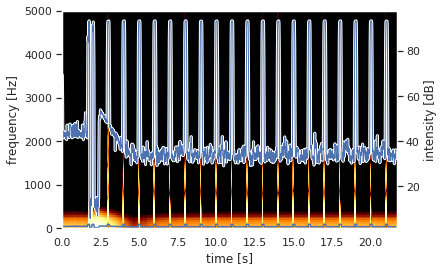

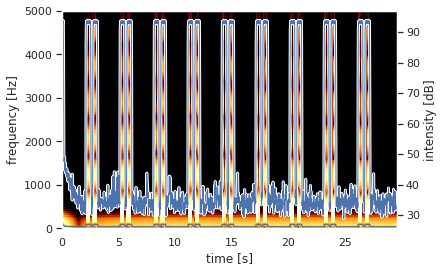

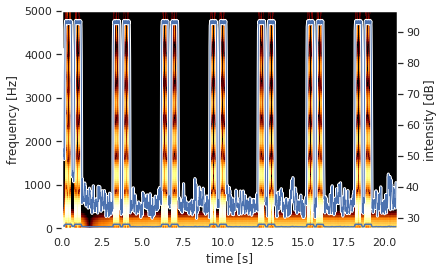

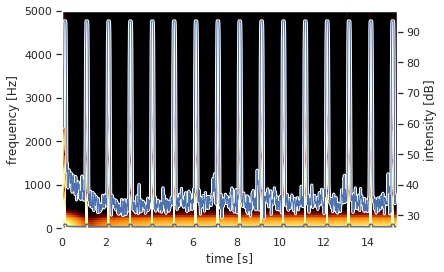

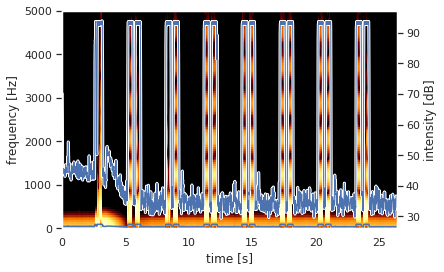

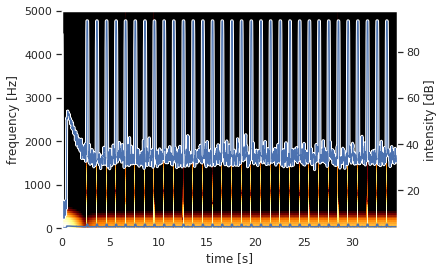

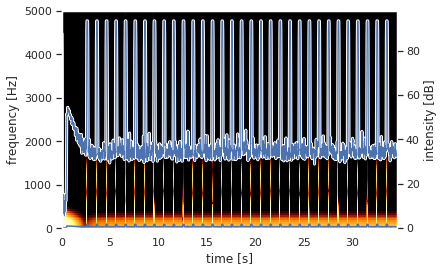

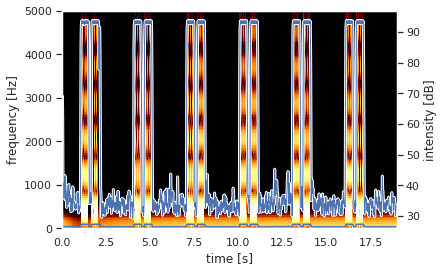

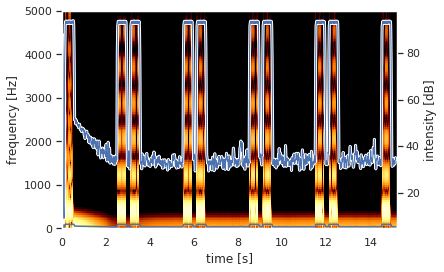

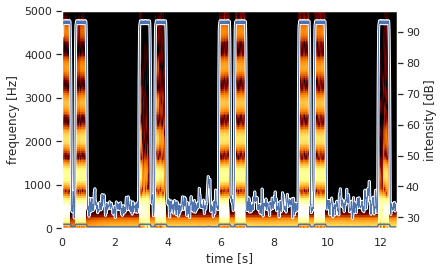

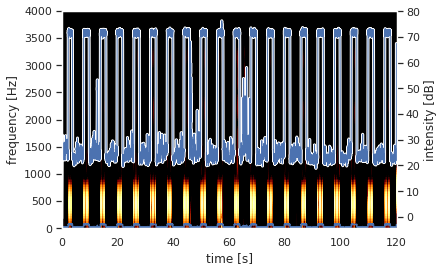

In [96]:
for i in range(1,22):
  snd = parselmouth.Sound("/content/drive/My Drive/tring_tring_Dataset /"+str(i)+".mp3")
  intensity = snd.to_intensity()
  spectrogram = snd.to_spectrogram()

  def draw_spectrogram(spectrogram, dynamic_range=50):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

  def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    #plt.ylim(0)
    plt.ylabel("intensity [dB]")
    plt.xlabel("time [sec]")

  plt.figure()
  plt.plot(intensity.xs(), intensity.values.T)
  draw_spectrogram(spectrogram)
  plt.twinx()
  draw_intensity(intensity)
  plt.xlim([snd.xmin, snd.xmax])
  

In [0]:
from pydub import AudioSegment

# print “start”, when the “tring tring” start, and print “stop” when it was stop from a live playing music. Also, save the new cut short audio from start to stop time.

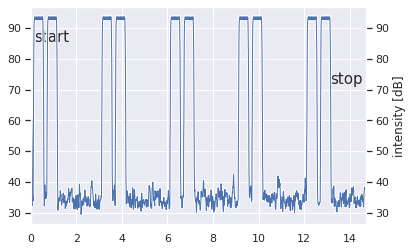

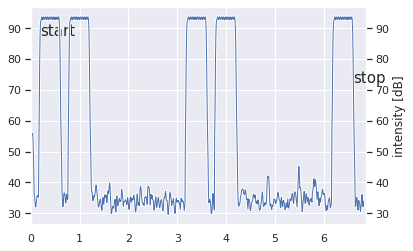

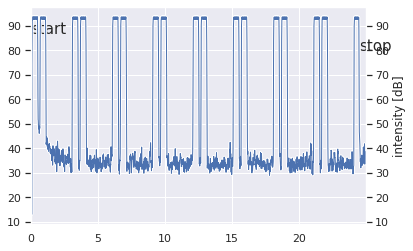

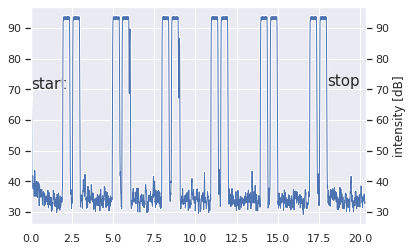

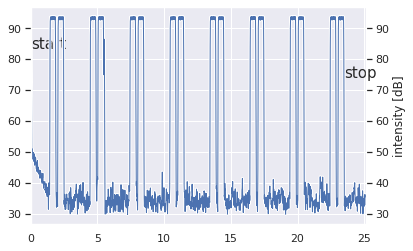

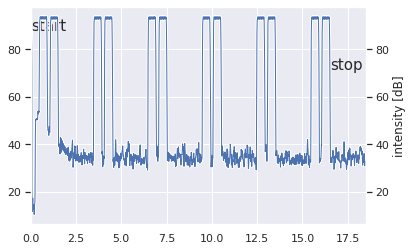

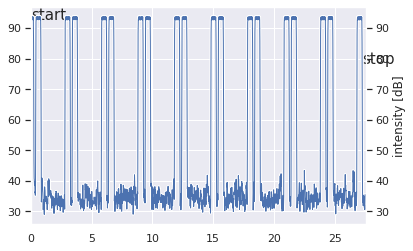

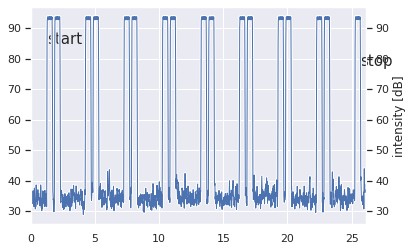

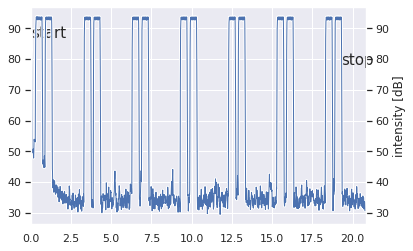

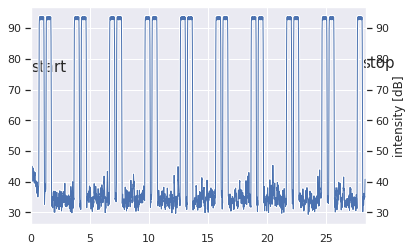

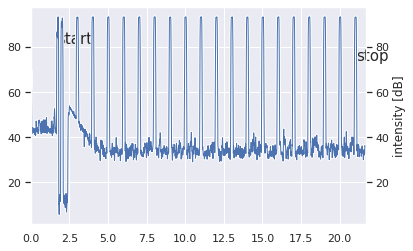

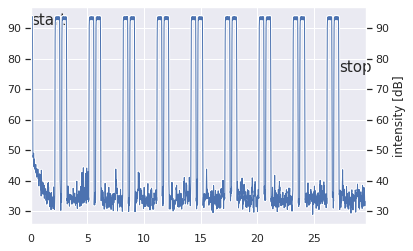

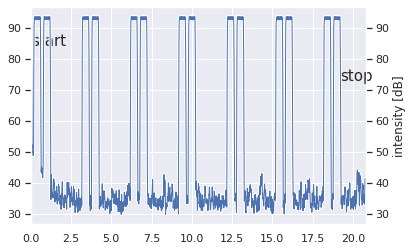

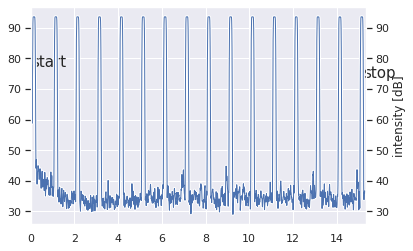

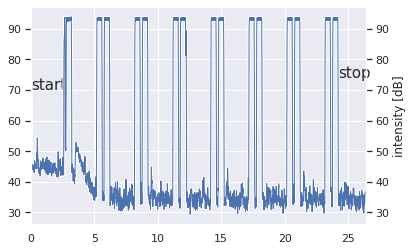

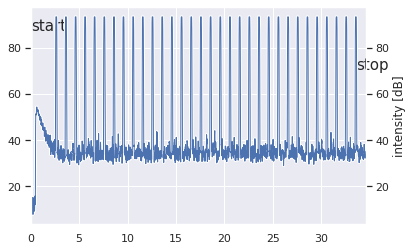

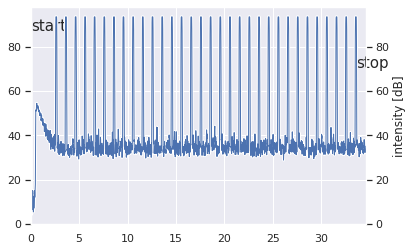

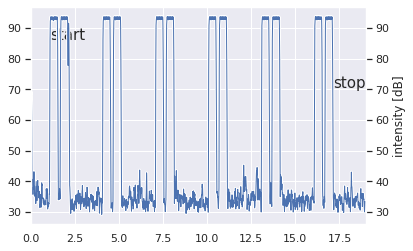

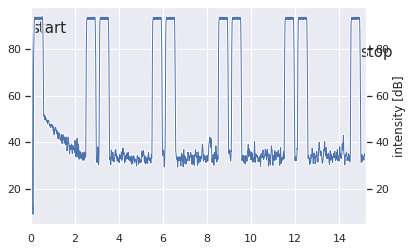

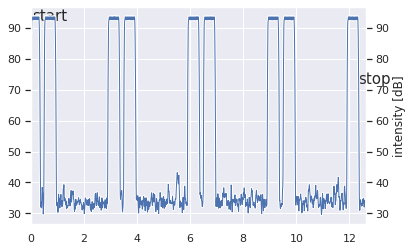

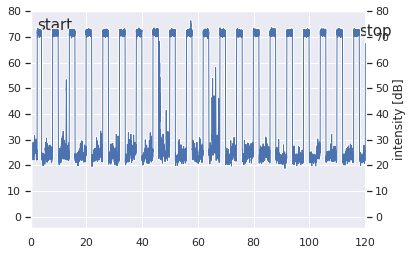

In [83]:
for i in range(1,22):
  snd = parselmouth.Sound("/content/drive/My Drive/tring_tring_Dataset /"+str(i)+".mp3")
  sound = AudioSegment.from_mp3("/content/drive/My Drive/tring_tring_Dataset /"+str(i)+".mp3")
  intensity = snd.to_intensity()
  spectrogram = snd.to_spectrogram()
  I=intensity.values.T.reshape(-1)
  s=[]
  g=[]

  for (i,j) in zip(intensity.xs(),I): 
    if j>=70:
      s.append(i)
      g.append(j)

  s=np.array(s)
  g=np.array(g)


  def draw_spectrogram(spectrogram, dynamic_range=50):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

  def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    #plt.ylim(0)
    plt.ylabel("intensity [dB]")
    plt.xlabel("time [sec]")

  StartTime = s[1]*1000
  EndTime = s[-1]*1000 # ms
  plt.figure()
  plt.plot(intensity.xs(), intensity.values.T)
  #draw_spectrogram(spectrogram)
  plt.text(s[1],g[1], s="start", fontsize=15)
  plt.text(s[-1],g[-1], s="stop", fontsize=15)
  #plt.scatter(g,s)
  plt.twinx()
  draw_intensity(intensity)
  plt.xlim([snd.xmin, snd.xmax])
  

# save 0 to 10s
  Output_MP3 = sound[StartTime:EndTime]
  #for j in range(1,3):
  Output_MP3.export("/content/sample_data/song2/"+str(i)+".mp3",format="mp3")  
  plt.show()


# checking the audio of caller tune

(0.0, 35.97125)

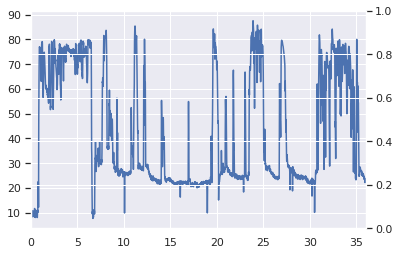

In [95]:
snd = parselmouth.Sound("/content/music.wav")
intensity = snd.to_intensity()
spectrogram = snd.to_spectrogram()
I=intensity.values.T.reshape(-1)
s=[]
g=[]

for (i,j) in zip(intensity.xs(),I): 
  if j>=70:
      s.append(i)
      g.append(j)

s=np.array(s)
g=np.array(g)

def draw_spectrogram(spectrogram, dynamic_range=50):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")
def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    #plt.ylim(0)
    plt.ylabel("intensity [dB]")
    plt.xlabel("time [sec]")

plt.figure()
plt.plot(intensity.xs(), intensity.values.T)
#draw_spectrogram(spectrogram)
#draw_intensity(intensity)
plt.twinx()
plt.xlim([snd.xmin, snd.xmax]) 

# The audio sample has varying intensity. Therefore we need to have a larger classified dataset for caller tunes

In [0]:
X, sample_rate = librosa.load("/content/music.wav")
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=0)
feature = mfccs

# features extracted from caller tune music.wav file

In [90]:
feature

array([-39.84705329, -39.84705329, -39.84705329, ..., -39.71207051,
       -39.79892107, -38.91444081])

In [91]:
feature.shape

(1550,)

# this way feature matrix can be built for different caller tunes

# Download the cut-short audio files according to the start and stop time and saved them.

In [81]:
!zip -r /content/file.zip /content/sample_data/song2

  adding: content/sample_data/song2/ (stored 0%)
  adding: content/sample_data/song2/18.448260770975057.mp3 (deflated 1%)
  adding: content/sample_data/song2/34.53797505668934.mp3 (deflated 1%)
  adding: content/sample_data/song2/25.056750566893427.mp3 (deflated 1%)
  adding: content/sample_data/song2/18.944424036281177.mp3 (deflated 1%)
  adding: content/sample_data/song2/26.04907709750567.mp3 (deflated 1%)
  adding: content/sample_data/song2/27.483444444444444.mp3 (deflated 1%)
  adding: content/sample_data/song2/20.745648526077098.mp3 (deflated 1%)
  adding: content/sample_data/song2/24.923444444444446.mp3 (deflated 1%)
  adding: content/sample_data/song2/29.497158730158734.mp3 (deflated 1%)
  adding: content/sample_data/song2/20.770709750566894.mp3 (deflated 1%)
  adding: content/sample_data/song2/6.824015873015873.mp3 (deflated 1%)
  adding: content/sample_data/song2/28.34646485260771.mp3 (deflated 1%)
  adding: content/sample_data/song2/120.0569375.mp3 (deflated 41%)
  adding: co

In [0]:
from google.colab import files
files.download("/content/file.zip")